In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('merged1.csv', encoding='latin1', low_memory=False)
df.head()

,Year,NOC,Sport,Event,Medal,Gold,Silver,Bronze,Total,host
0,1992,CHN,Basketball,Basketball Men's Basketball,No medal,16,22,16,54,ESP
1,2012,CHN,Judo,Judo Men's Extra-Lightweight,No medal,39,31,22,92,GBR
2,1920,DEN,Football,Football Men's Football,No medal,0,0,0,0,BEL
3,1900,DEN,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0,0,0,FRA
4,1932,NED,Athletics,Athletics Women's 100 metres,No medal,0,0,0,0,USA


In [7]:
df.columns = df.columns.str.strip().str.upper()
df['NOC']  = df['NOC'].astype(str).str.strip().str.upper()
df['HOST'] = df['HOST'].astype(str).str.strip().str.upper()

df['GOLD']   = pd.to_numeric(df['GOLD'],   errors='coerce').fillna(0)
df['SILVER'] = pd.to_numeric(df['SILVER'], errors='coerce').fillna(0)
df['BRONZE'] = pd.to_numeric(df['BRONZE'], errors='coerce').fillna(0)
df['TOTAL']  = pd.to_numeric(df['TOTAL'],  errors='coerce').fillna(0)

df['IS_HOST'] = (df['NOC'] == df['HOST'])
df

,YEAR,NOC,SPORT,EVENT,MEDAL,GOLD,SILVER,BRONZE,TOTAL,HOST,IS_HOST
0,1992,CHN,Basketball,Basketball Men's Basketball,No medal,16,22,16,54,ESP,False
1,2012,CHN,Judo,Judo Men's Extra-Lightweight,No medal,39,31,22,92,GBR,False
2,1920,DEN,Football,Football Men's Football,No medal,0,0,0,0,BEL,False
3,1900,DEN,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0,0,0,FRA,False
4,1932,NED,Athletics,Athletics Women's 100 metres,No medal,0,0,0,0,USA,False
...,...,...,...,...,...,...,...,...,...,...,...
273232,2024,ITA,Wrestling,Women's Freestyle 50kg,No medal,12,13,15,40,FRA,False
273233,2024,NED,Athletics,4 x 400m Relay Mixed,Gold,0,0,0,0,FRA,False
273234,2024,FRA,Equestrian,Jumping Team,Bronze,16,26,22,64,FRA,True
273235,2024,FRA,Equestrian,Jumping Team,Bronze,16,26,22,64,FRA,True


In [8]:
group_sport = df.groupby(['NOC', 'SPORT'], as_index=False).agg({
    'GOLD':   'sum',
    'SILVER': 'sum',
    'BRONZE': 'sum',
    'TOTAL':  'sum'
})
group_sport.head()['MEDALS'] = group_sport['GOLD'] + group_sport['SILVER'] + group_sport['BRONZE']
group_sport.head()

,NOC,SPORT,GOLD,SILVER,BRONZE,TOTAL
0,AFG,Athletics,0,0,4,4
1,AFG,Boxing,0,0,1,1
2,AFG,Cycling Road,0,0,0,0
3,AFG,Football,0,0,0,0
4,AFG,Hockey,0,0,0,0


In [10]:
df['MEDALS'] = df['GOLD'] + df['SILVER'] + df['BRONZE']

host_medals = df[df['IS_HOST'] == True]['MEDALS'].mean()
non_host_medals = df[df['IS_HOST'] == False]['MEDALS'].mean()

print(f"Average medals when country is host: {host_medals:.2f}")
print(f"Average medals when country is not host: {non_host_medals:.2f}")


Average medals when country is host: 69.28
Average medals when country is not host: 17.53


In [13]:
group_sport['MEDALS'] = group_sport['GOLD'] + group_sport['SILVER'] + group_sport['BRONZE']
host_sport = df.groupby(['IS_HOST','SPORT'], as_index=False)['MEDALS'].sum()

host_sport_mean = df.groupby(['IS_HOST','SPORT'], as_index=False)['MEDALS'].mean()
important_sport_df = group_sport.sort_values(['NOC', 'MEDALS'], ascending=[True, False])
important_sport_df.head()

,NOC,SPORT,GOLD,SILVER,BRONZE,TOTAL,MEDALS
0,AFG,Athletics,0,0,4,4,4
8,AFG,Taekwondo,0,0,4,4,4
1,AFG,Boxing,0,0,1,1,1
5,AFG,Judo,0,0,1,1,1
2,AFG,Cycling Road,0,0,0,0,0


In [43]:
group_sport.to_csv('country_sport_medals.csv',index=False)

In [17]:
def medal_to_counts(m):
    m = str(m).strip().upper()
    if m == "GOLD":
        return (1, 0, 0)
    elif m == "SILVER":
        return (0, 1, 0)
    elif m == "BRONZE":
        return (0, 0, 1)
    else:
        return (0, 0, 0)

In [18]:
df.columns = df.columns.str.upper().str.strip()
df[['MGOLD', 'MSILVER', 'MBRONZE']] = df['MEDAL'].apply(lambda x: pd.Series(medal_to_counts(x)))
df.head()

,YEAR,NOC,SPORT,EVENT,MEDAL,GOLD,SILVER,BRONZE,TOTAL,HOST,IS_HOST,MEDALS,MGOLD,MSILVER,MBRONZE
0,1992,CHN,Basketball,Basketball Men's Basketball,No medal,16,22,16,54,ESP,False,54,0,0,0
1,2012,CHN,Judo,Judo Men's Extra-Lightweight,No medal,39,31,22,92,GBR,False,92,0,0,0
2,1920,DEN,Football,Football Men's Football,No medal,0,0,0,0,BEL,False,0,0,0,0
3,1900,DEN,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0,0,0,FRA,False,0,1,0,0
4,1932,NED,Athletics,Athletics Women's 100 metres,No medal,0,0,0,0,USA,False,0,0,0,0


In [19]:
grouped = df.groupby(['NOC', 'YEAR', 'SPORT'], as_index=False).agg({
    'MGOLD': 'sum',
    'MSILVER': 'sum',
    'MBRONZE': 'sum',
    'HOST': 'first'  # 取本组中的第一个host(同一年)
})
grouped.rename(columns={'MGOLD': 'GOLD', 'MSILVER': 'SILVER', 'MBRONZE': 'BRONZE'}, inplace=True)
grouped['MEDALS'] = grouped['GOLD'] + grouped['SILVER'] + grouped['BRONZE']
grouped.head()

,NOC,YEAR,SPORT,GOLD,SILVER,BRONZE,HOST,MEDALS
0,AFG,1936,Athletics,0,0,0,DEU,0
1,AFG,1936,Hockey,0,0,0,DEU,0
2,AFG,1948,Football,0,0,0,GBR,0
3,AFG,1948,Hockey,0,0,0,GBR,0
4,AFG,1956,Hockey,0,0,0,AUS,0


In [20]:
print("Sum of gold:", grouped['GOLD'].sum())
print("Sum of silver:", grouped['SILVER'].sum())
print("Sum of bronze:", grouped['BRONZE'].sum())

Sum of gold: 14075
Sum of silver: 13864
Sum of bronze: 14247


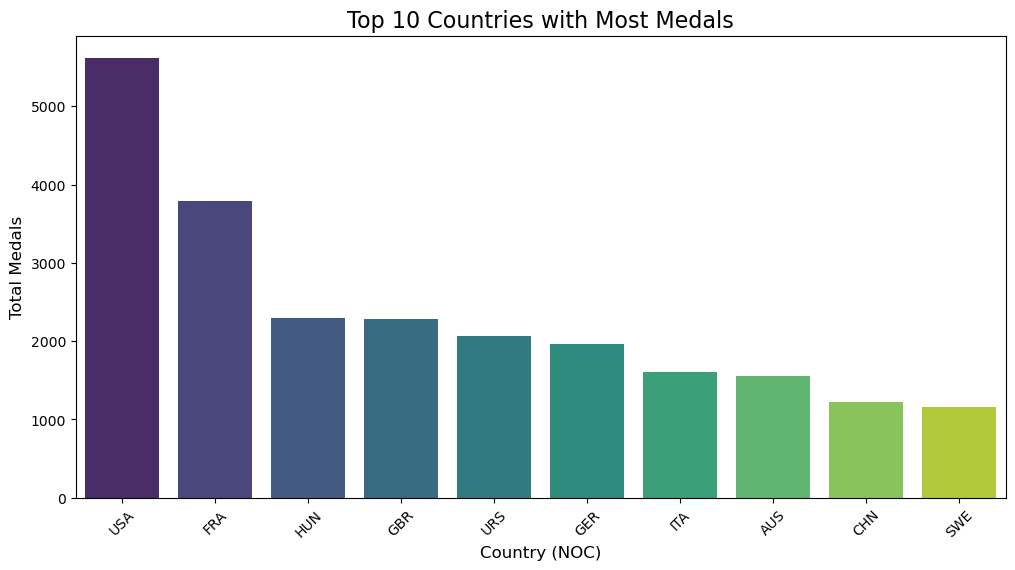

In [21]:
# Top 10 countries with the most medals
top_countries = grouped.groupby('NOC')['MEDALS'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries with Most Medals', fontsize=16)
plt.xlabel('Country (NOC)', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)
plt.xticks(rotation=45)
plt.show()


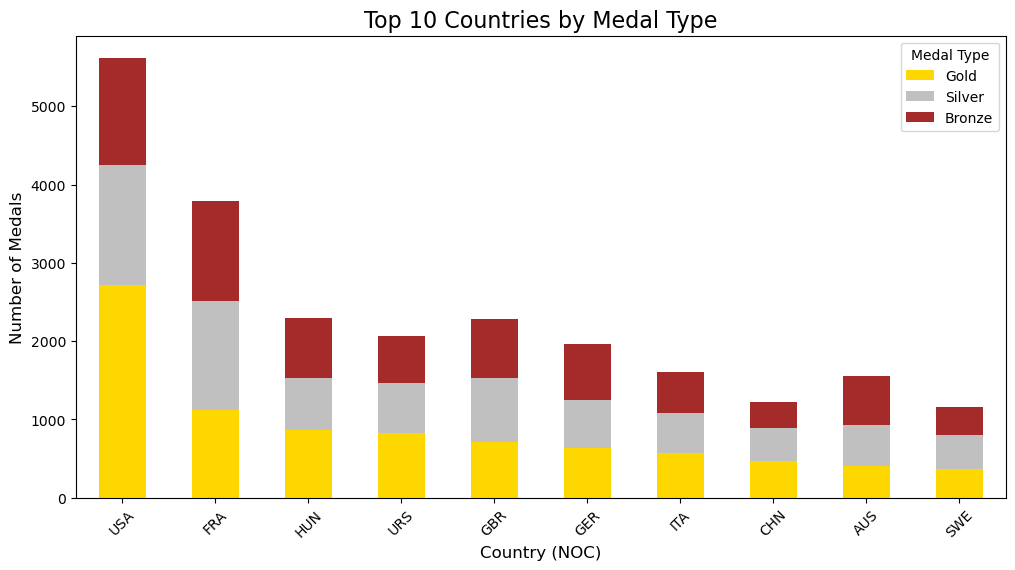

In [22]:
# Group the data by country (NOC) and sum the medals
country_medals = grouped.groupby('NOC')[['GOLD', 'SILVER', 'BRONZE']].sum()

country_medals = country_medals.sort_values('GOLD', ascending=False).head(10)

country_medals.plot(kind='bar', stacked=True, figsize=(12, 6), color=['gold', 'silver', 'brown'])
plt.title('Top 10 Countries by Medal Type', fontsize=16)
plt.xlabel('Country (NOC)', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Medal Type', labels=['Gold', 'Silver', 'Bronze'])
plt.show()


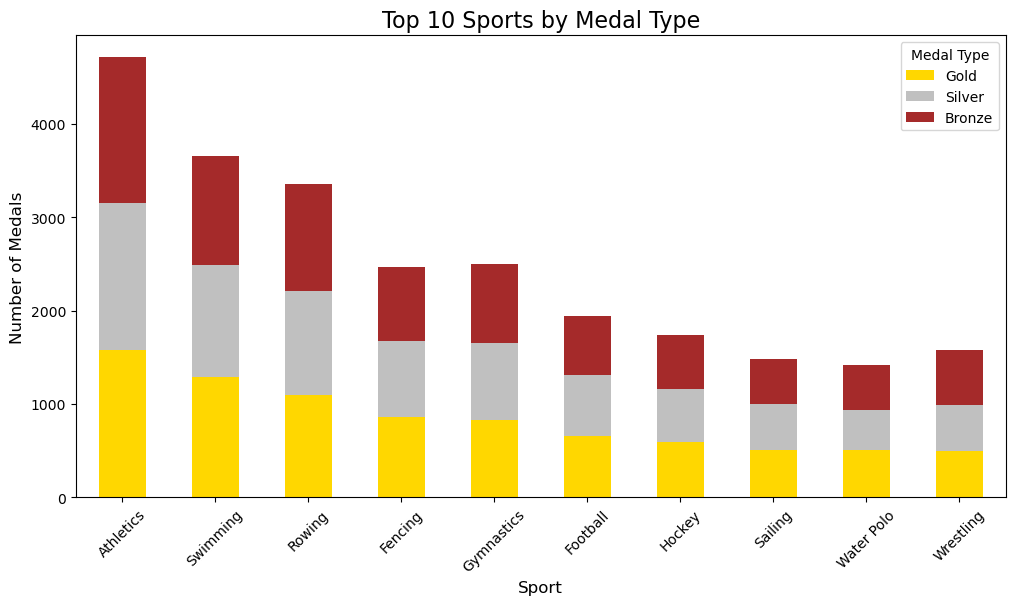

In [24]:
# 按照运动项目进行奖牌数量汇总
sport_medals = grouped.groupby('SPORT')[['GOLD', 'SILVER', 'BRONZE']].sum()

sport_medals = sport_medals.sort_values('GOLD', ascending=False).head(10)

sport_medals.plot(kind='bar', stacked=True, figsize=(12, 6), color=['gold', 'silver', 'brown'])
plt.title('Top 10 Sports by Medal Type', fontsize=16)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Medal Type', labels=['Gold', 'Silver', 'Bronze'])
plt.show()


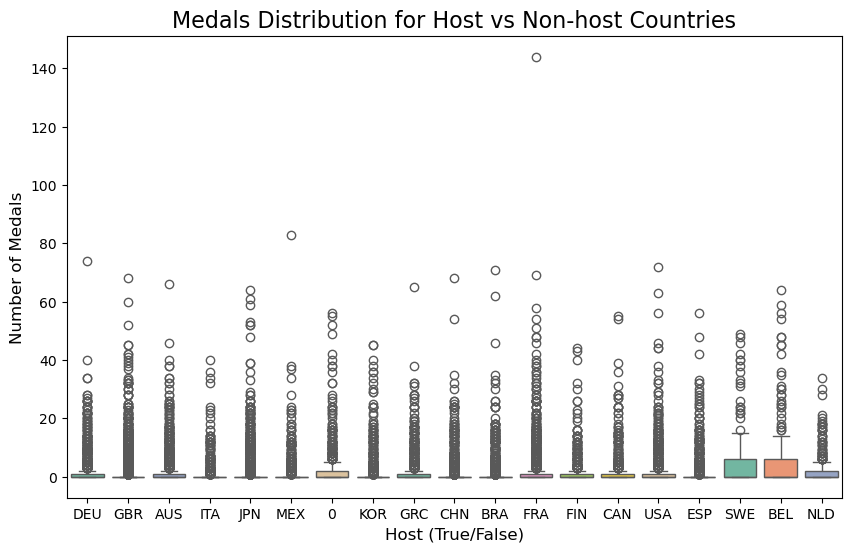

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HOST', y='MEDALS', data=grouped, palette='Set2')
plt.title('Medals Distribution for Host vs Non-host Countries', fontsize=16)
plt.xlabel('Host (True/False)', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.show()


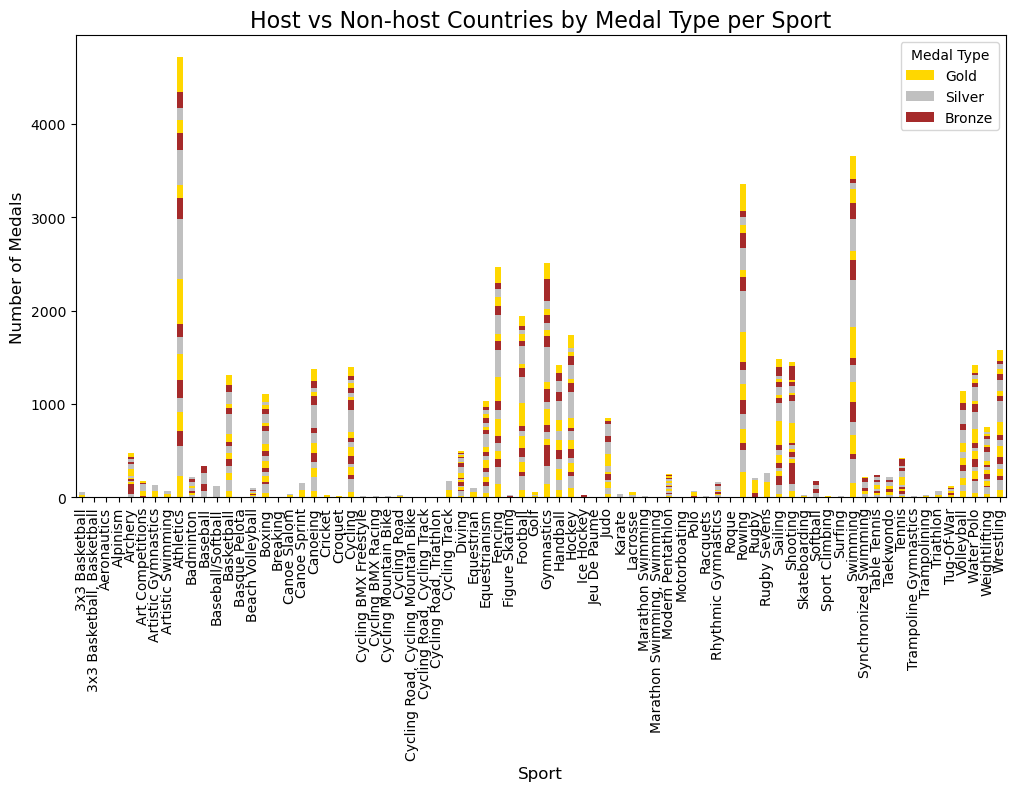

In [37]:
# 主办国与非主办国的奖牌总数对比
host_vs_nonhost = grouped.groupby(['HOST', 'SPORT'])['MEDALS'].sum().unstack().T

host_vs_nonhost.plot(kind='bar', stacked=True, figsize=(12, 6), color=['gold', 'silver', 'brown'])
plt.title('Host vs Non-host Countries by Medal Type per Sport', fontsize=16)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Medal Type', labels=['Gold', 'Silver', 'Bronze'])
plt.show()
